In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 5.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from math import pi

In [ ]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '6a03db2c04ad4d98a9d2234bc36ef32a'
client_secret = 'b3ebb989ceea4c26aa85112cdf4c72e5' 

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id = '0zKGGz4N9t3smY0qUX8tF8' 
results = sp.playlist(playlist_id)

In [ ]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [ ]:
final_df.head(5)

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0072MKNpMeJNx8aRfTNfQW,Holiday - A Soldier Is Never Off Duty (Origina...,Shaayraana,"Pritam, Arijit Singh",False,53,0.604,0.665,2,-4.244,...,0.000013,0.0832,0.702,93.963,audio_features,spotify:track:0072MKNpMeJNx8aRfTNfQW,https://api.spotify.com/v1/tracks/0072MKNpMeJN...,https://api.spotify.com/v1/audio-analysis/0072...,4.357317,4
1,2sryZMs4aLRCLbXiOl69lP,Phata Poster Nikhla Hero (Original Motion Pict...,Main Rang Sharbaton Ka - Reprise,"Arijit Singh, Pritam",False,47,0.637,0.576,6,-9.202,...,0.000000,0.0904,0.775,90.007,audio_features,spotify:track:2sryZMs4aLRCLbXiOl69lP,https://api.spotify.com/v1/tracks/2sryZMs4aLRC...,https://api.spotify.com/v1/audio-analysis/2sry...,4.627017,4
2,3kNhbi9ebsthSZYKvoBeve,Holiday - A Soldier Is Never Off Duty (Origina...,Tu Hi Toh Hai,"Pritam, Benny Dayal",False,43,0.611,0.914,0,-3.519,...,0.000008,0.0873,0.740,129.036,audio_features,spotify:track:3kNhbi9ebsthSZYKvoBeve,https://api.spotify.com/v1/tracks/3kNhbi9ebsth...,https://api.spotify.com/v1/audio-analysis/3kNh...,3.924183,4
3,6p358EIjLEoDZI5vu99k6N,Entertainment (Original Motion Picture Soundtr...,Tera Naam Doon,"Atif Aslam, Shalmali Kholgade",False,49,0.534,0.804,0,-6.224,...,0.000011,0.0970,0.555,80.221,audio_features,spotify:track:6p358EIjLEoDZI5vu99k6N,https://api.spotify.com/v1/tracks/6p358EIjLEoD...,https://api.spotify.com/v1/audio-analysis/6p35...,4.731133,4
4,1YMLgvsQdE27r30q0fsLeV,Genius (Original Motion Picture Soundtrack),Tera Fitoor,Arijit Singh,False,62,0.576,0.688,9,-5.136,...,0.043900,0.2620,0.726,135.984,audio_features,spotify:track:1YMLgvsQdE27r30q0fsLeV,https://api.spotify.com/v1/tracks/1YMLgvsQdE27...,https://api.spotify.com/v1/audio-analysis/1YML...,5.166667,4


In [ ]:
features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.573571,0.673429,4.428571,-6.391714,1.0,0.058871,0.505550,0.003200,0.159050,0.584071,107.794143,4.650355,3.928571
std,0.085369,0.150636,3.321591,1.575996,0.0,0.045392,0.242694,0.011715,0.079815,0.194328,26.229534,0.591057,0.267261
min,0.411000,0.277000,0.000000,-9.202000,1.0,0.030100,0.098700,0.000000,0.074800,0.324000,80.221000,3.462533,3.000000
25%,0.541250,0.637000,2.000000,-6.925000,1.0,0.031050,0.351250,0.000000,0.091300,0.374500,87.745250,4.364454,4.000000
50%,0.564000,0.676500,4.500000,-6.503000,1.0,0.039050,0.589000,0.000007,0.128000,0.635500,94.485000,4.647550,4.000000
75%,0.609250,0.726000,7.000000,-5.408000,1.0,0.061300,0.677000,0.000142,0.214250,0.720250,131.287500,5.109000,4.000000
max,0.786000,0.914000,9.000000,-3.519000,1.0,0.188000,0.903000,0.043900,0.297000,0.916000,158.107000,5.617450,4.000000


In [ ]:
music_feature = features_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


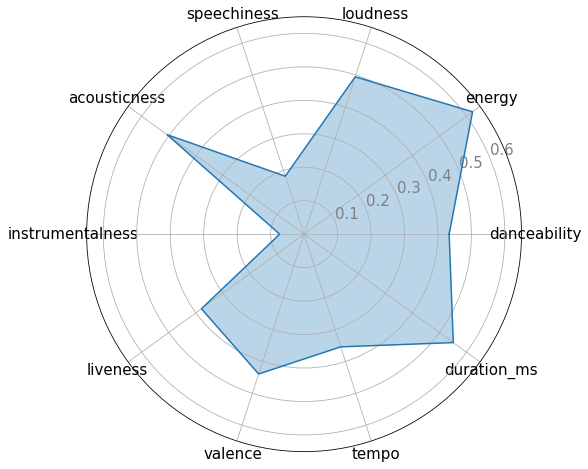

In [ ]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()